In [7]:
from community_knapsack import *
from evaluation import evaluation
import random

In [8]:
# The algorithms to use for this evaluation:
exact_algorithms = [
    PBMultiAlgorithm.MEMOIZATION,
    PBMultiAlgorithm.DYNAMIC_PROGRAMMING,
    PBMultiAlgorithm.ILP_SOLVER
]

approximation_algorithms = [
    PBMultiAlgorithm.GREEDY,
    PBMultiAlgorithm.RATIO_GREEDY,
    PBMultiAlgorithm.BRANCH_AND_BOUND,
    PBMultiAlgorithm.SIMULATED_ANNEALING,
    PBMultiAlgorithm.GENETIC_ALGORITHM
]

#### This notebook tests the scalability of the algorithms with an increasing number of dimensions with small budgets.
---

In [9]:
# The boundaries of this evaluation:

# We test between one and ten dimensions where each budget is randomly generated
# between 10 and 1000 and the cost of each project in a dimension must be within
# 5-50% of the budget in that dimension.

random.seed(181)

num_projects = 50
num_voters = 3000

start_dimensions = 1
end_dimensions = 10
step_dimensions = 1

budget = [random.randint(10, 1000) for _ in range(end_dimensions//step_dimensions)]
cost_bounds = [
    (int(b * 0.05), int(b * 0.5))
    for bid, b in enumerate(budget)
]

In [10]:
x_axis = list(range(start_dimensions, end_dimensions + 1, step_dimensions))

In [11]:
problems = evaluation.generate_multi_problems(
    num_project_bounds=[(num_projects, num_projects)],
    num_voters_bounds=[(num_voters, num_voters)],
    dimension_bounds=x_axis,
    budget_bounds=[[[(b, b) for b in budget[:d]]] for d in x_axis],
    cost_bounds=[[[cost_bound for cost_bound in cost_bounds[:d]]] for d in x_axis]
)

In [12]:
# Obtain the exact results for this evaluation:
exact_results = evaluation.solve_problems(
    problem_list=problems,
    algorithms=exact_algorithms,
    timeout=120,
    max_fail=1,
    file_name='ext-small-dimensions.json',
    output=True
)

In [13]:
# Obtain the exact results for this evaluation:
approximation_results = evaluation.solve_problems(
    problem_list=problems,
    algorithms=approximation_algorithms,
    timeout=120,
    max_fail=1,
    file_name='apx-small-dimensions.json',
    output=True
)

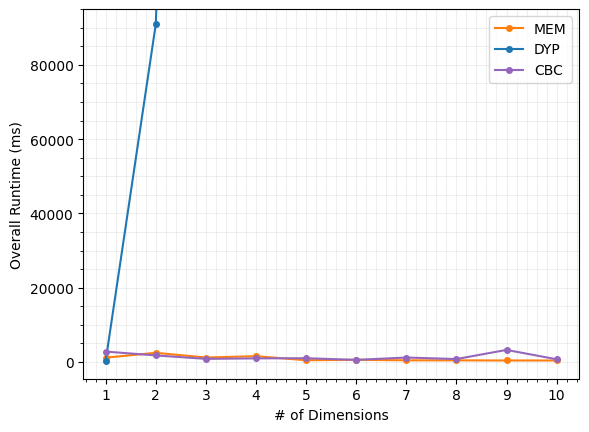

In [14]:
# Plot the exact algorithm runtimes over the problems:
evaluation.plot_2d(
    x_axis=x_axis,
    y_axes=evaluation.get_y_axes(exact_results, exact_algorithms, 2),
    x_label='# of Dimensions',
    y_label='Overall Runtime (ms)',
    labels=evaluation.get_labels(exact_algorithms),
    colors=evaluation.get_colors(exact_algorithms),
    alphas=evaluation.get_alphas(exact_algorithms),
    sizes=evaluation.get_sizes(exact_algorithms),
    x_ticks=x_axis,
    x_tick_minor=False,
    fix_y=(-4500, 95000)
)

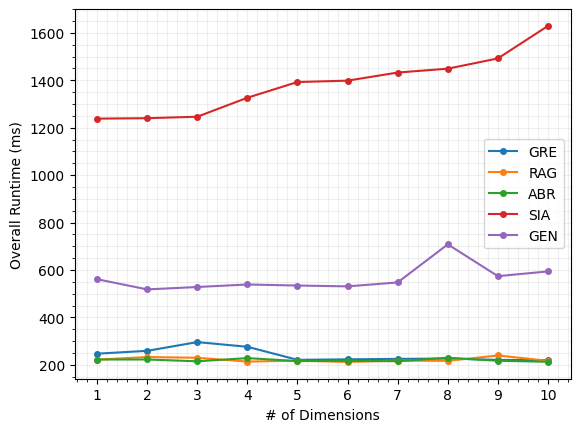

In [15]:
# Plot the exact algorithm runtimes over the problems:
evaluation.plot_2d(
    x_axis=x_axis,
    y_axes=evaluation.get_y_axes(approximation_results, approximation_algorithms, 2),
    x_label='# of Dimensions',
    y_label='Overall Runtime (ms)',
    labels=evaluation.get_labels(approximation_algorithms),
    colors=evaluation.get_colors(approximation_algorithms),
    alphas=evaluation.get_alphas(approximation_algorithms),
    sizes=evaluation.get_sizes(approximation_algorithms),
    x_ticks=x_axis,
    x_tick_minor=False
)

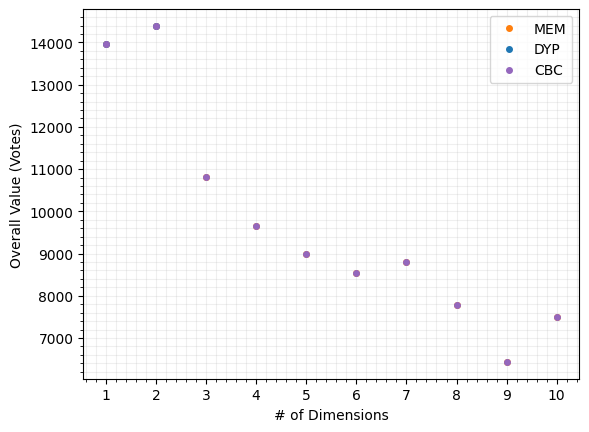

In [18]:
# Plot the approximation vs. exact algorithm values over the problems:
evaluation.plot_2d(
    x_axis=x_axis,
    y_axes=evaluation.get_y_axes(exact_results, exact_algorithms, 0),
    x_label='# of Dimensions',
    y_label='Overall Value (Votes)',
    marker='o',
    labels=evaluation.get_labels(exact_algorithms),
    colors=evaluation.get_colors(exact_algorithms),
    alphas=evaluation.get_alphas(exact_algorithms),
    sizes=evaluation.get_sizes(exact_algorithms),
    x_ticks=x_axis,
    x_tick_minor=False,
)

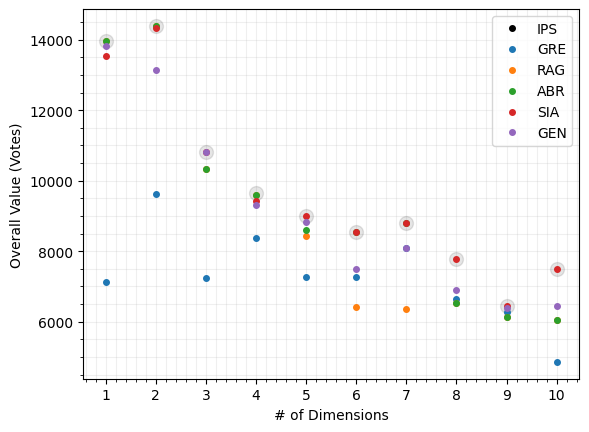

In [16]:
# Plot the approximation vs. exact algorithm values over the problems:
evaluation.plot_2d(
    x_axis=x_axis,
    y_axes=[evaluation.get_y_axis(exact_results, PBSingleAlgorithm.ILP_SOLVER, 0)] + evaluation.get_y_axes(approximation_results, approximation_algorithms, 0),
    x_label='# of Dimensions',
    y_label='Overall Value (Votes)',
    marker='o',
    labels=['IPS'] + evaluation.get_labels(approximation_algorithms),
    colors=['black'] + evaluation.get_colors(approximation_algorithms),
    alphas=[0.1] + evaluation.get_alphas(approximation_algorithms),
    sizes=[10] + evaluation.get_sizes(approximation_algorithms),
    x_ticks=x_axis,
    x_tick_minor=False,
)